In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import pickle

In [3]:
df=pd.read_csv("customer_churn_data.csv")
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [5]:
df.sample(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
123,124,30,Female,9,31.29,Month-to-Month,Fiber Optic,281.61,Yes,Yes
413,414,57,Female,6,116.70,One-Year,NaN,700.20,No,Yes
862,863,60,Male,34,116.19,Month-to-Month,DSL,3950.46,Yes,Yes
325,326,32,Male,44,49.85,One-Year,NaN,2193.40,No,Yes
979,980,52,Female,34,82.36,Month-to-Month,Fiber Optic,2800.24,No,Yes
449,450,34,Female,30,49.12,Month-to-Month,Fiber Optic,1473.60,No,Yes
161,162,52,Female,19,92.18,Month-to-Month,Fiber Optic,1751.42,Yes,Yes
813,814,46,Female,19,81.92,Two-Year,NaN,1556.48,No,Yes
762,763,70,Female,1,110.09,One-Year,NaN,110.09,No,Yes
921,922,34,Male,0,74.83,One-Year,Fiber Optic,0.00,No,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [7]:
df.drop("CustomerID", axis=1, inplace=True)

In [8]:
df.isna().sum().sum()

np.int64(297)

In [9]:
df["InternetService"]=df["InternetService"].fillna("")

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,44.674000,18.97300,74.391290,1404.364060
std,9.797741,18.89257,25.712083,1571.755048
min,12.000000,0.00000,30.000000,0.000000
25%,38.000000,5.00000,52.357500,345.217500
50%,45.000000,13.00000,74.060000,872.870000
75%,51.000000,26.00000,96.102500,1900.175000
max,83.000000,122.00000,119.960000,12416.250000


In [12]:
numeric_data=df.select_dtypes(include="number")
numeric_data.corr()

,Age,Tenure,MonthlyCharges,TotalCharges
Age,1.000000,0.000472,0.006362,-0.001896
Tenure,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.001896,0.894868,0.304893,1.000000


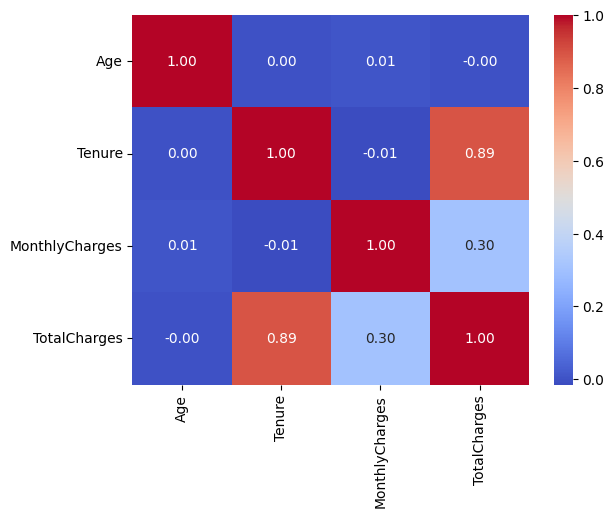

In [13]:
sns.heatmap(numeric_data.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

In [14]:
df["Churn"].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

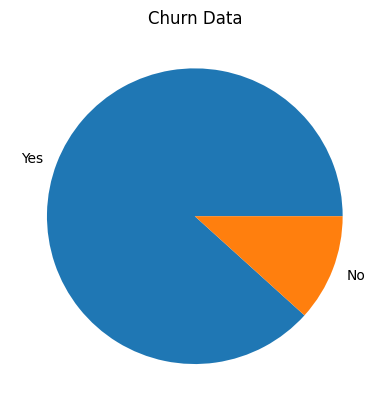

In [15]:
churn_num=df["Churn"].value_counts()
# plt.Figure(figsize=(5,5))
plt.title("Churn Data")
plt.pie(churn_num , labels=churn_num.index)
plt.show()

In [16]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

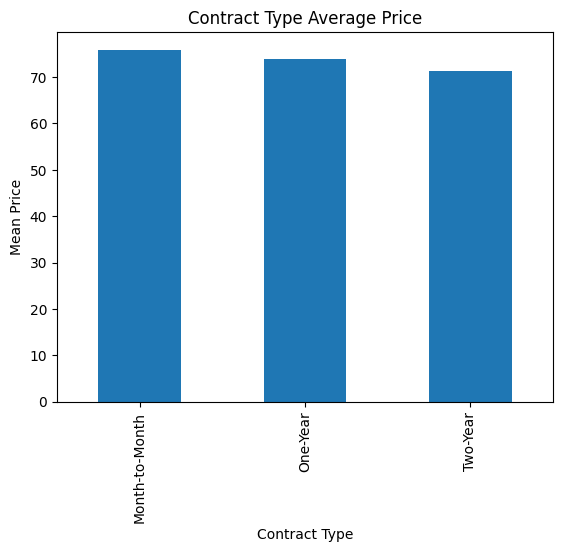

In [17]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.xlabel("Contract Type")
plt.ylabel("Mean Price")
plt.title("Contract Type Average Price")
plt.show()

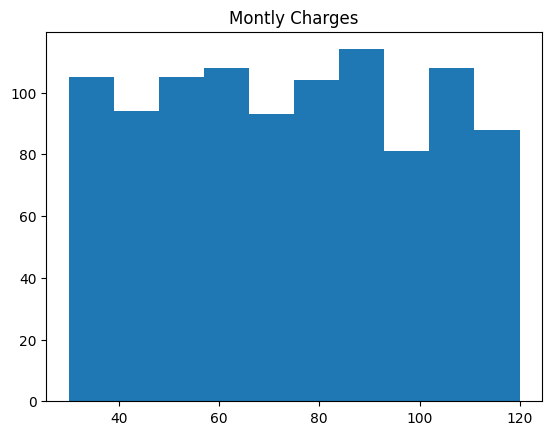

In [18]:
plt.hist(df["MonthlyCharges"])
plt.title("Montly Charges")
plt.show()

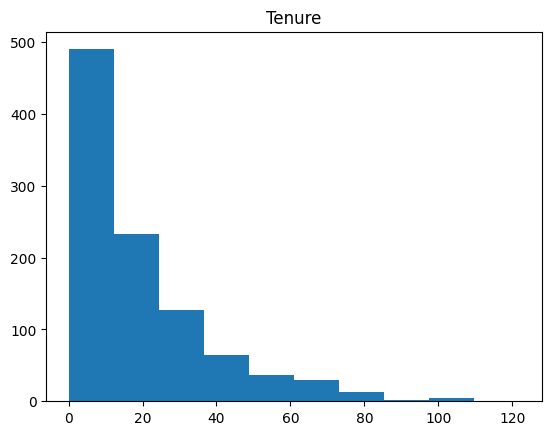

In [19]:
plt.hist(df["Tenure"])
plt.title("Tenure")
plt.show()

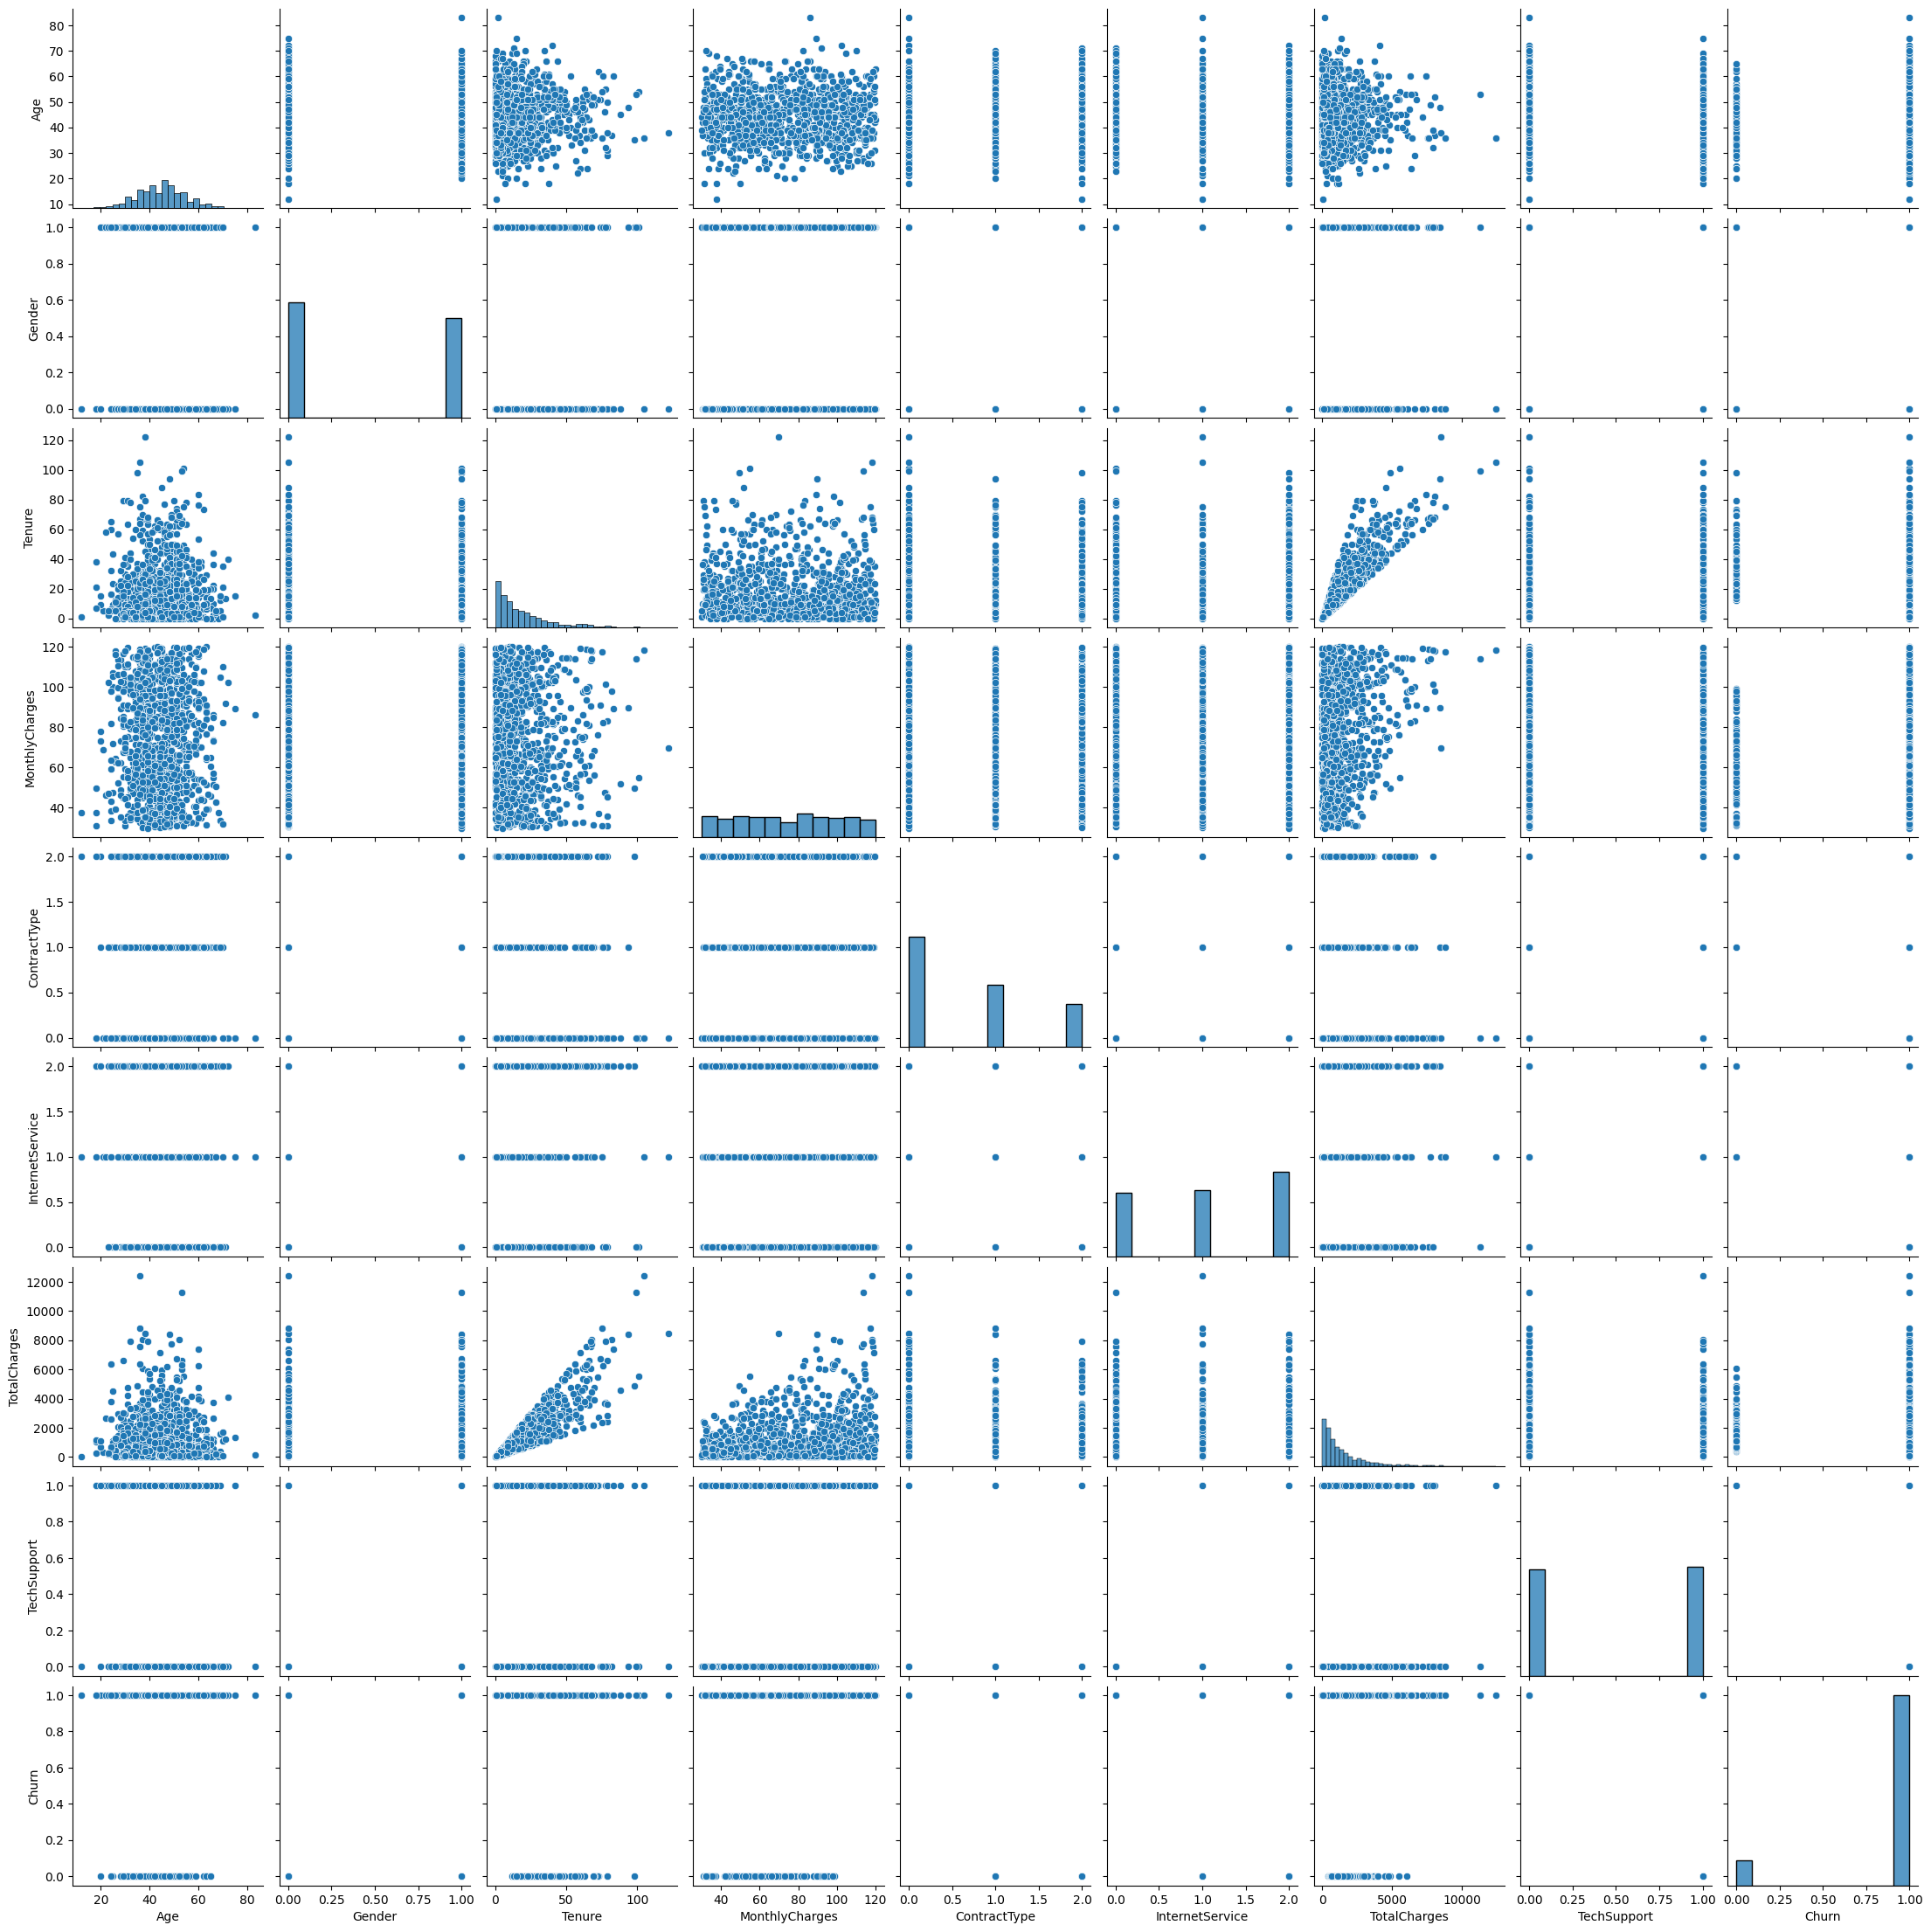

In [70]:
sns.pairplot(df)

In [21]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges', 'ContractType',
       'InternetService', 'TotalCharges', 'TechSupport', 'Churn'],
      dtype='object')

In [22]:
encoders = {}
for col in ["Gender", "ContractType", "InternetService", "TechSupport"]:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    encoders[col]=le

In [23]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})


In [24]:
y=df["Churn"]
X=df.drop("Churn",axis=1)

In [25]:
X

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport
0,49,1,4,88.35,0,2,353.40,1
1,43,1,0,36.67,0,2,0.00,1
2,51,0,2,63.79,0,2,127.58,0
3,60,0,8,102.34,1,1,818.72,1
4,42,1,32,69.01,0,0,2208.32,0
...,...,...,...,...,...,...,...,...
995,42,1,41,37.14,0,2,1522.74,1
996,62,1,9,80.93,0,0,728.37,0
997,51,0,15,111.72,0,2,1675.80,1
998,39,1,68,65.67,1,0,4465.56,0


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int64

In [27]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
scaler=StandardScaler()

In [29]:
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.fit_transform(Xtest)

Logistic Regression

In [30]:
logr=LogisticRegression()

In [31]:
logr.fit(Xtrain,Ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
ypred=logr.predict(Xtest)

In [33]:
acc=accuracy_score(ypred,Ytest)
print(f"Accuracy Score :{acc*100}%")

Accuracy Score :92.33333333333333%


In [34]:
print(classification_report(ypred,Ytest))

              precision    recall  f1-score   support

           0       0.51      0.83      0.63        24
           1       0.98      0.93      0.96       276

    accuracy                           0.92       300
   macro avg       0.75      0.88      0.80       300
weighted avg       0.95      0.92      0.93       300



K Nearest Neighbor

In [35]:
knn=KNeighborsClassifier()

In [36]:
param_grid= {
    "n_neighbors":[3,5,7,9],
    "weights" :["uniform","distance"]
}

In [37]:
gridkn=GridSearchCV(knn,param_grid,cv=5)

In [38]:
gridkn.fit(Xtrain,Ytrain)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,7


In [39]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [40]:
ypred=gridkn.predict(Xtest)

In [41]:
acc=accuracy_score(ypred,Ytest)
print(f"Accuracy Score :{acc*100}%")

Accuracy Score :95.33333333333334%


In [42]:
print(classification_report(ypred,Ytest))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.98      0.97      0.97       265

    accuracy                           0.95       300
   macro avg       0.88      0.91      0.89       300
weighted avg       0.96      0.95      0.95       300



Support Vector Classifier

In [43]:
svm=SVC()

In [44]:
param_grid={
    "C": [0.01,0.1,0.5,1],
    "kernel":["linear","rbf","poly"]
}

In [45]:
gridsvc=GridSearchCV(svm,param_grid, cv=5)

In [46]:
gridsvc.fit(Xtrain,Ytrain)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [47]:
gridsvc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [48]:
ypred=gridsvc.predict(Xtest)

In [49]:
acc=accuracy_score(ypred,Ytest)
print(f"Accuracy Score :{acc*100}%")

Accuracy Score :95.33333333333334%


In [50]:
print(classification_report(ypred,Ytest))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        31
           1       0.99      0.96      0.97       269

    accuracy                           0.95       300
   macro avg       0.85      0.93      0.89       300
weighted avg       0.96      0.95      0.96       300



Random Forest Classifier

In [51]:
rfc=RandomForestClassifier()

In [52]:
param_grid={
    "n_estimators":[32,64,128,256],
    "max_features":[2,3,4],
    "bootstrap": [True,False]
}

In [53]:
gridrfc=GridSearchCV(rfc,param_grid,cv=5)

In [54]:
gridrfc.fit(Xtrain,Ytrain)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,64


In [55]:
gridrfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64}

In [56]:
ypred=gridrfc.predict(Xtest)

In [57]:
acc=accuracy_score(Ytest,ypred)

In [58]:
print(f"Accuracy Score :{acc*100}%")

Accuracy Score :99.66666666666667%


In [59]:
cm=confusion_matrix(Ytest,ypred)

In [60]:
print(cm)

[[ 38   1]
 [  0 261]]


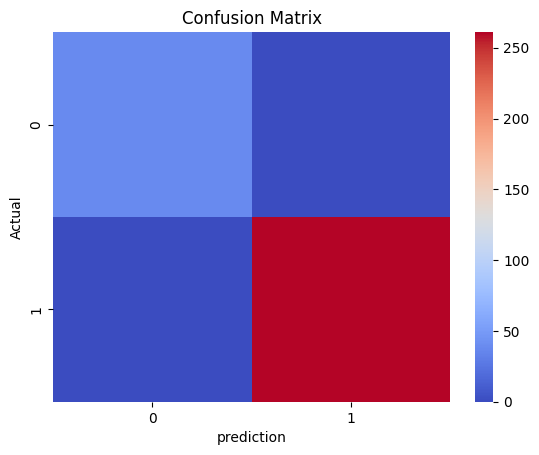

In [61]:
sns.heatmap(cm,cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("prediction")
plt.ylabel("Actual")
plt.show()

In [62]:
print(classification_report(ypred,Ytest))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      1.00      1.00       262

    accuracy                           1.00       300
   macro avg       0.99      1.00      0.99       300
weighted avg       1.00      1.00      1.00       300



Model Comparison

In [63]:
model_results = {
    "Logistic Regression": logr,
    "KNN": gridkn.best_estimator_,
    "SVM": gridsvc.best_estimator_,
    "Random Forest": gridrfc.best_estimator_
}

comparison = {}

for name, model in model_results.items():
    ypred = model.predict(Xtest)
    acc = accuracy_score(Ytest, ypred)
    comparison[name] = acc
    print(f"{name}")
    print(f"Accuracy: {acc*100:.2f}%")
    print("-" * 40)


best_model_name = max(comparison, key=comparison.get)
print (model_results[best_model_name])
best_model = model_results[best_model_name]
print(best_model)

print(f"\nBest Model: {best_model} ({comparison[best_model_name]*100:.2f}% accuracy)")


Logistic Regression
Accuracy: 92.33%
----------------------------------------
KNN
Accuracy: 95.33%
----------------------------------------
SVM
Accuracy: 95.33%
----------------------------------------
Random Forest
Accuracy: 99.67%
----------------------------------------
RandomForestClassifier(max_features=2, n_estimators=64)
RandomForestClassifier(max_features=2, n_estimators=64)

Best Model: RandomForestClassifier(max_features=2, n_estimators=64) (99.67% accuracy)


In [64]:
comparison

{'Logistic Regression': 0.9233333333333333,
 'KNN': 0.9533333333333334,
 'SVM': 0.9533333333333334,
 'Random Forest': 0.9966666666666667}

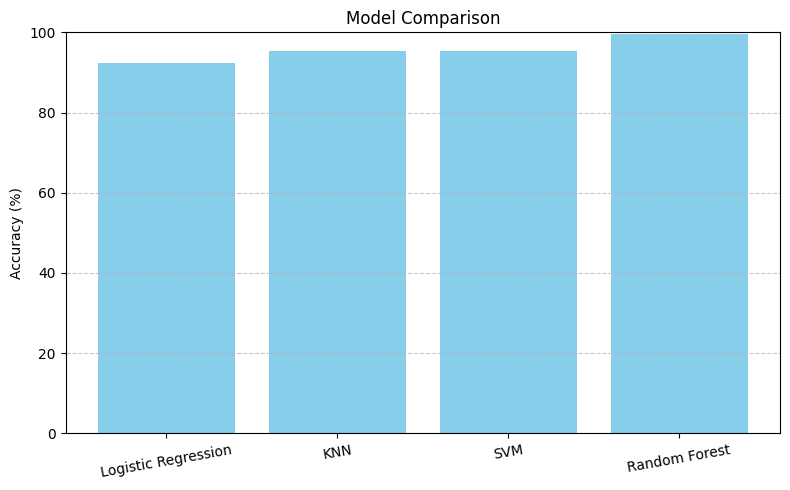

In [65]:
plt.figure(figsize=(8,5))
plt.bar(comparison.keys(), [v*100 for v in comparison.values()], color='skyblue')
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison")
plt.xticks(rotation=10)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Saving Model

In [66]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)
    

with open("Xtest.pkl", "wb") as f:
    pickle.dump(Xtest, f)

with open("Ytest.pkl", "wb") as f:
    pickle.dump(Ytest, f)


In [67]:
with open("model.pkl","wb") as f:
    pickle.dump(best_model,f)

In [68]:
print(type(best_model))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
